<a href="https://colab.research.google.com/github/Kowshik-S13/Webpage-article-Sentiment-Analysis/blob/main/stock_price_prediction_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')


In [2]:
df = pd.read_csv('/content/TSLA.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,19.000000,25.00,17.540001,23.889999,23.889999,18766300
1,2010-06-30,25.790001,30.42,23.299999,23.830000,23.830000,17187100
2,2010-07-01,25.000000,25.92,20.270000,21.959999,21.959999,8218800
3,2010-07-02,23.000000,23.10,18.709999,19.200001,19.200001,5139800
4,2010-07-06,20.000000,20.00,15.830000,16.110001,16.110001,6866900


In [7]:
df=df[["Date","Open","High","Low","Close","Volume","Adj Close"]]

In [9]:
df.shape

(2416, 7)

In [10]:
df.describe()

,Open,High,Low,Close,Volume,Adj Close
count,2416.000000,2416.000000,2416.000000,2416.000000,2.416000e+03,2416.000000
mean,186.271147,189.578224,182.916639,186.403651,5.572722e+06,186.403651
std,118.740163,120.892329,116.857591,119.136020,4.987809e+06,119.136020
min,16.139999,16.629999,14.980000,15.800000,1.185000e+05,15.800000
25%,34.342498,34.897501,33.587501,34.400002,1.899275e+06,34.400002
50%,213.035004,216.745002,208.870002,212.960007,4.578400e+06,212.960007
75%,266.450012,270.927513,262.102501,266.774994,7.361150e+06,266.774994
max,673.690002,786.140015,673.520020,780.000000,4.706500e+07,780.000000


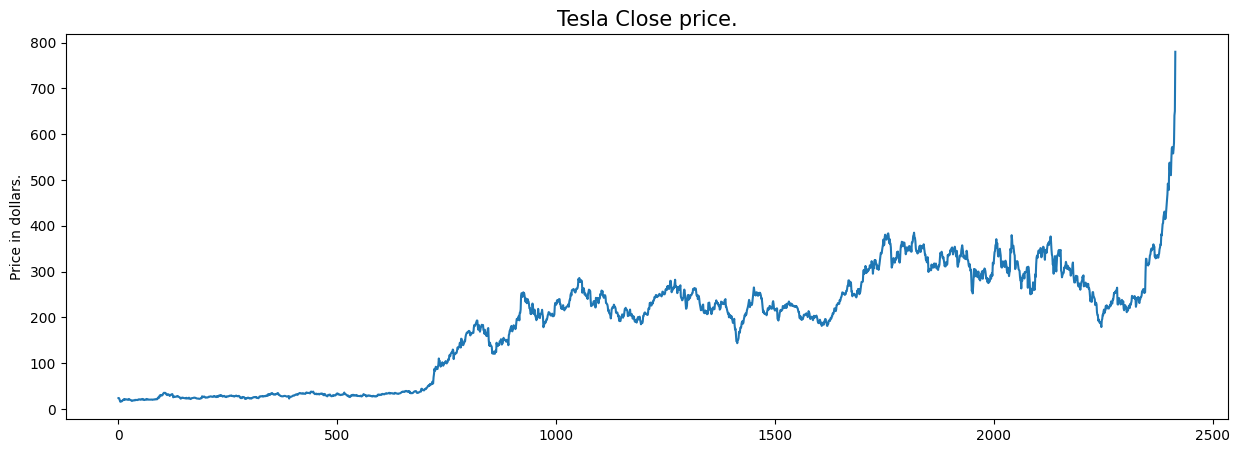

In [11]:
plt.figure(figsize=(15,5))
plt.plot(df['Close'])
plt.title('Tesla Close price.', fontsize=15)
plt.ylabel('Price in dollars.')
plt.show()


In [12]:
df[df['Close'] == df['Adj Close']].shape


(2416, 7)

In [13]:
df = df.drop(['Adj Close'], axis=1)


In [14]:
df.isnull().sum()


Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

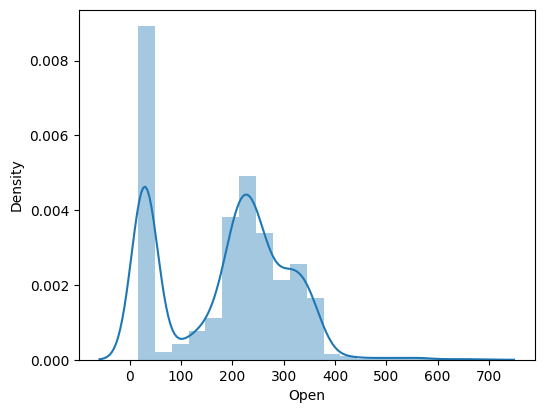

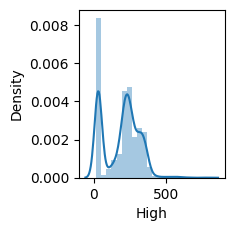

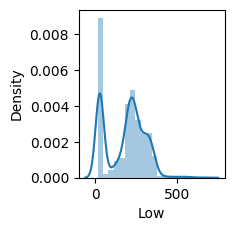

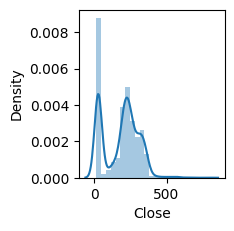

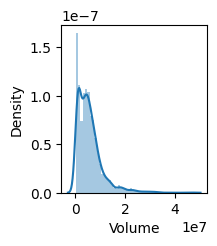

In [16]:
features = ['Open', 'High', 'Low', 'Close', 'Volume']

plt.subplots(figsize=(20,10))

for i, col in enumerate(features):
  plt.subplot(2,3,i+1)
  sb.distplot(df[col])
  plt.show()


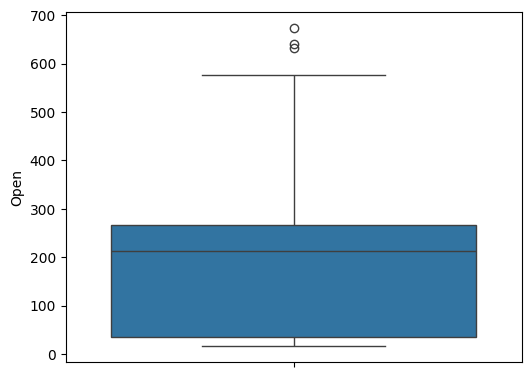

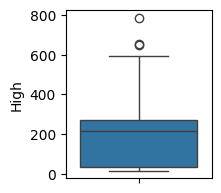

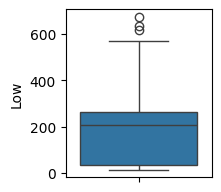

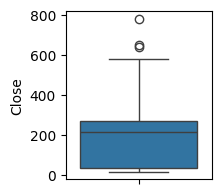

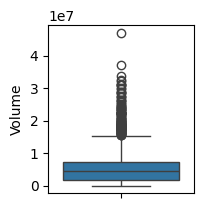

In [18]:
plt.subplots(figsize=(20,10))
for i, col in enumerate(features):
  plt.subplot(2,3,i+1)
  sb.boxplot(df[col])
  plt.show()


In [21]:
splitted = df['Date'].str.split('-', expand=True)

df['day'] = splitted[2].astype('int')
df['month'] = splitted[1].astype('int')
df['year'] = splitted[0].astype('int')

df.head()


,Date,Open,High,Low,Close,Volume,day,month,year
0,2010-06-29,19.000000,25.00,17.540001,23.889999,18766300,29,6,2010
1,2010-06-30,25.790001,30.42,23.299999,23.830000,17187100,30,6,2010
2,2010-07-01,25.000000,25.92,20.270000,21.959999,8218800,1,7,2010
3,2010-07-02,23.000000,23.10,18.709999,19.200001,5139800,2,7,2010
4,2010-07-06,20.000000,20.00,15.830000,16.110001,6866900,6,7,2010


In [22]:
df['is_quarter_end'] = np.where(df['month']%3==0,1,0)
df.head()


,Date,Open,High,Low,Close,Volume,day,month,year,is_quarter_end
0,2010-06-29,19.000000,25.00,17.540001,23.889999,18766300,29,6,2010,1
1,2010-06-30,25.790001,30.42,23.299999,23.830000,17187100,30,6,2010,1
2,2010-07-01,25.000000,25.92,20.270000,21.959999,8218800,1,7,2010,0
3,2010-07-02,23.000000,23.10,18.709999,19.200001,5139800,2,7,2010,0
4,2010-07-06,20.000000,20.00,15.830000,16.110001,6866900,6,7,2010,0


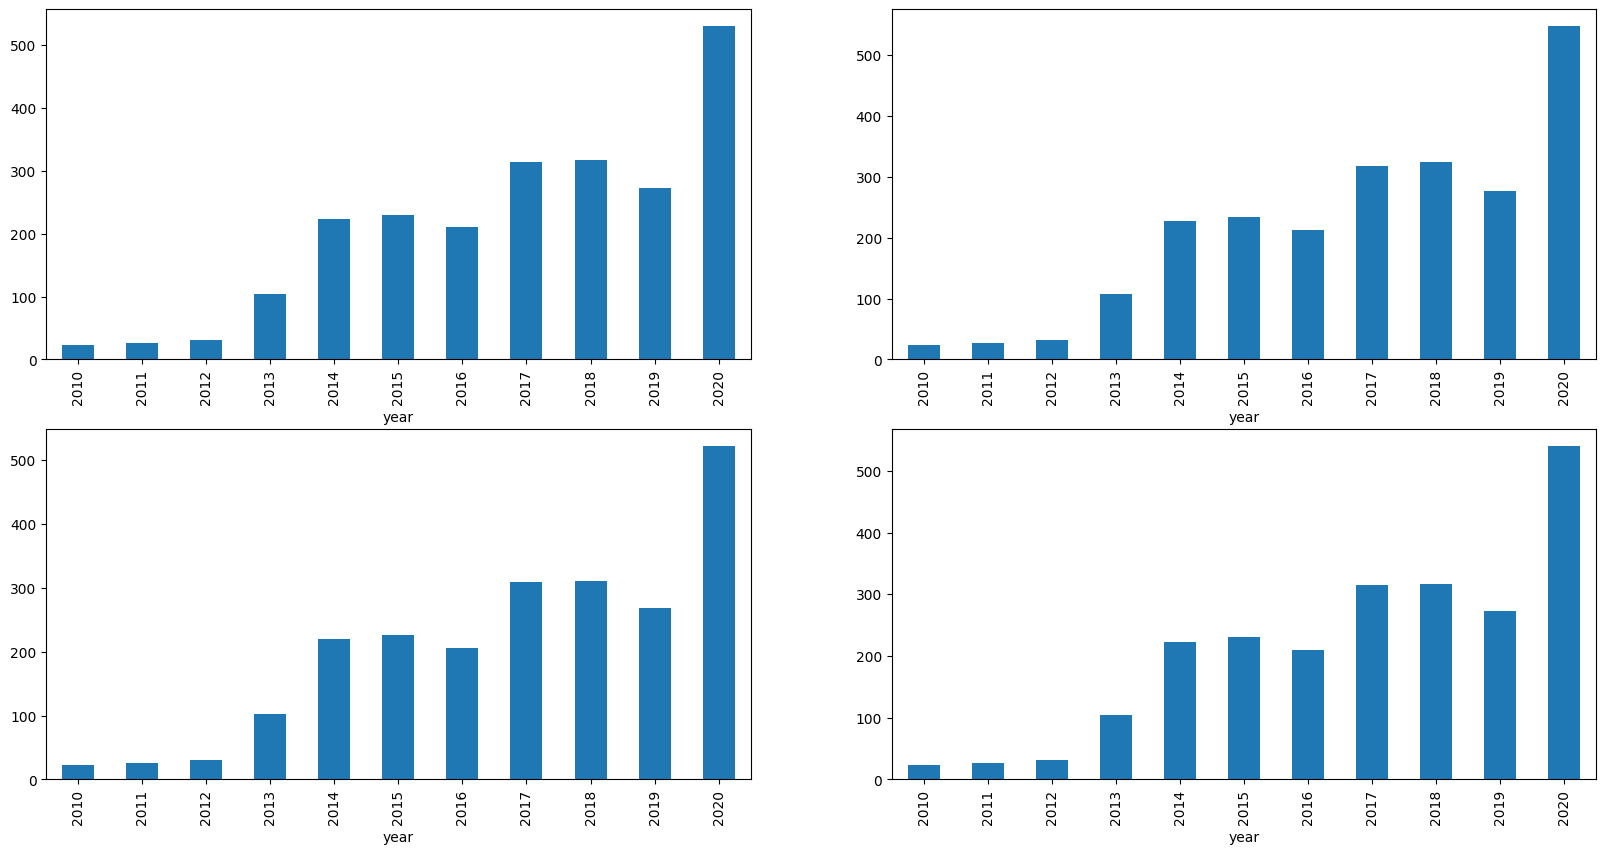

In [41]:
data_grouped = df.groupby('year').mean()
plt.subplots(figsize=(20,10))

for i, col in enumerate(['Open', 'High', 'Low', 'Close']):
  plt.subplot(2,2,i+1)
  data_grouped[col].plot.bar()
plt.show()


In [26]:
df.describe()

,Open,High,Low,Close,Volume,day,month,year,is_quarter_end
count,2416.000000,2416.000000,2416.000000,2416.000000,2.416000e+03,2416.000000,2416.000000,2416.000000,2416.000000
mean,186.271147,189.578224,182.916639,186.403651,5.572722e+06,15.748344,6.645281,2014.776904,0.331126
std,118.740163,120.892329,116.857591,119.136020,4.987809e+06,8.757534,3.445464,2.787784,0.470716
min,16.139999,16.629999,14.980000,15.800000,1.185000e+05,1.000000,1.000000,2010.000000,0.000000
25%,34.342498,34.897501,33.587501,34.400002,1.899275e+06,8.000000,4.000000,2012.000000,0.000000
50%,213.035004,216.745002,208.870002,212.960007,4.578400e+06,16.000000,7.000000,2015.000000,0.000000
75%,266.450012,270.927513,262.102501,266.774994,7.361150e+06,23.000000,10.000000,2017.000000,1.000000
max,673.690002,786.140015,673.520020,780.000000,4.706500e+07,31.000000,12.000000,2020.000000,1.000000


In [42]:
df.groupby('is_quarter_end').mean()

,Open,High,Low,Close,Volume,day,month,year
is_quarter_end,,,,,,,,
0,185.875081,189.254226,182.449499,186.085081,5.767062e+06,15.710396,6.173886,2014.816213
1,187.071200,190.232700,183.860262,187.047163,5.180154e+06,15.825000,7.597500,2014.697500


In [40]:
df=df.drop("Date",axis=1)

In [44]:
df['open-close'] = df['Open'] - df['Close']
df['low-high'] = df['Low'] - df['High']
df['target'] = np.where(df['Close'].shift(-1) > df['Close'], 1, 0)
df

,Open,High,Low,Close,Volume,day,month,year,is_quarter_end,open-close,low-high,target
0,19.000000,25.000000,17.540001,23.889999,18766300,29,6,2010,1,-4.889999,-7.459999,0
1,25.790001,30.420000,23.299999,23.830000,17187100,30,6,2010,1,1.960001,-7.120001,0
2,25.000000,25.920000,20.270000,21.959999,8218800,1,7,2010,0,3.040001,-5.650000,0
3,23.000000,23.100000,18.709999,19.200001,5139800,2,7,2010,0,3.799999,-4.390001,0
4,20.000000,20.000000,15.830000,16.110001,6866900,6,7,2010,0,3.889999,-4.170000,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2411,568.489990,576.809998,558.080017,566.900024,11788500,28,1,2020,0,1.589966,-18.729981,1
2412,575.690002,589.799988,567.429993,580.989990,17801500,29,1,2020,0,-5.299988,-22.369995,1
2413,632.419983,650.880005,618.000000,640.809998,29005700,30,1,2020,0,-8.390015,-32.880005,1
2414,640.000000,653.000000,632.520020,650.570007,15719300,31,1,2020,0,-10.570007,-20.479980,1


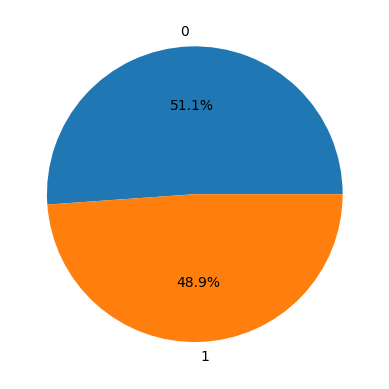

In [45]:
plt.pie(df['target'].value_counts().values,
		labels=[0, 1], autopct='%1.1f%%')
plt.show()


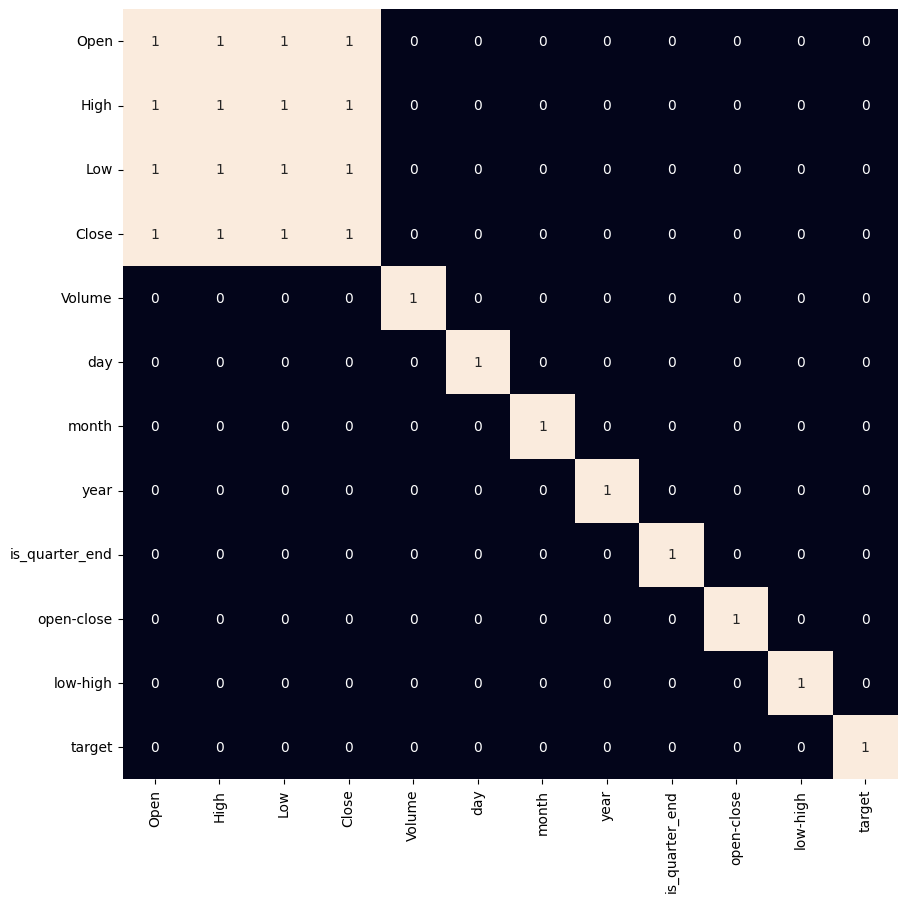

In [46]:
plt.figure(figsize=(10, 10))

# As our concern is with the highly
# correlated features only so, we will visualize
# our heatmap as per that criteria only.
sb.heatmap(df.corr() > 0.9, annot=True, cbar=False)
plt.show()


In [47]:
features = df[['open-close', 'low-high', 'is_quarter_end']]
target = df['target']

scaler = StandardScaler()
features = scaler.fit_transform(features)

X_train, X_valid, Y_train, Y_valid = train_test_split(
	features, target, test_size=0.1, random_state=2022)
print(X_train.shape, X_valid.shape)


(2174, 3) (242, 3)


In [50]:
models = [LogisticRegression(), SVC(
kernel='poly', probability=True), XGBClassifier()]

for i in range(3):
  models[i].fit(X_train, Y_train)

  print(f'{models[i]} : ')
  print('Training Accuracy : ', metrics.roc_auc_score(
	  Y_train, models[i].predict_proba(X_train)[:,1]))
  print('Validation Accuracy : ', metrics.roc_auc_score(
	  Y_valid, models[i].predict_proba(X_valid)[:,1]))
  print()


LogisticRegression() : 
Training Accuracy :  0.5228802330060918
Validation Accuracy :  0.4923371647509579

SVC(kernel='poly', probability=True) : 
Training Accuracy :  0.5294441128284586
Validation Accuracy :  0.46257525998905313

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...) : 
Training